<a href="https://colab.research.google.com/github/jvolcy/BannerAnalytics/blob/main/BannerAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import ipywidgets as widgets
mainHBox = widgets.HBox()
display(mainHBox)

HBox()

# README

## How To Use

**Overview**

This notebook generates a heat map showing the number of courses offered on different days and times at Spelman College in a particular semester.  This information is valuable for scheduling new courses.  The notebook allows you to narrow the analysis based on course prefixes (BIO, PHY, etc.) and level (200, 300, etc.).  For now, this works only for Spelman.  With some additional work, the notebook can be made to work with any school that uses the Ellucian Dynamic Scheduler (Morehouse, Clark, GTech, GSU, UGA, Kennesaw, etc.)
<br><br>
**Using the notebook is a three step process.**

***Step 1:*** Select the school (for now, only AUC schools work), semester and year.  Click 'Update Subjects'.

***Step 2:*** Select the subjects and levels you are interested in.  There are six available filters.  Use may use as many of these as you need, but at least 1 filter must be configured.  Configure a filter by selecting the subjects (coiurse prefixes) of interest.  Select the filter level by specifying the starting numbers of the courses of interest.  For example, to generate a heat map of 300 level courses, set the level to '3'.  Setting the level to '34' would select courses with numbers that begin with '34'.  This includes 340, 341, 341L, 342...349 etc.
<br><br>
Below are a few examples use cases.
<br><br>
Aim: Generate heat map for all 200-level Biology courses:
<br>Configuration: Use 1 filter. Set the prefix to 'SBIO', set the level to '2'.
<br><br>
Aim: Generate heat map of all 200-level Biology and Psychology course:
Configuration: Use 2 filters.  Set the prefix on filter 1 to 'SBIO' and the level to '2'.  Set the prefix on filter 2 to 'SPSY' and the level to '2'.
<br><br>

Aim: Generate heat map of all 200, 300 and 400 courses for all students.
Configuration Use 3 filters.  For each filter, select all prefixes.  Set the levels for the 3 filters to '1', '2' and '3'.
<br><br>
***Step 3:*** Select the time granularity (time bin size) for the heatmap and click on 'Execute' to generate the heatmap.  Depending on network speed and the number of courses to be processed, this may take up to a minute or more to complete.  The genrated heatmap represents the number of courses that overlap each of the time bins.

## Technical

*This code is not maintained.  If you have questions or find a bug, feel free to share it with me (jvolcy@spelman.edu), but in general, I won't be updating or maintaining the code.  Feel free to modify and use it as you wish!*<br>
<br>
We will be working with 3 different pages from the Ellucian Dynamic Schedule sites.  These are called *p_disp_dyn_sched*, *p_proc_term_date* and *p_get_crse_unsec*.  Example screenshots of each page are shown below.  *p_disp_dyn_sched* is the top level page.  *p_proc_term_date* is the course selection page.  *p_get_crse_unsec* is our results page.


<br>

**p_disp_dyn_sched**

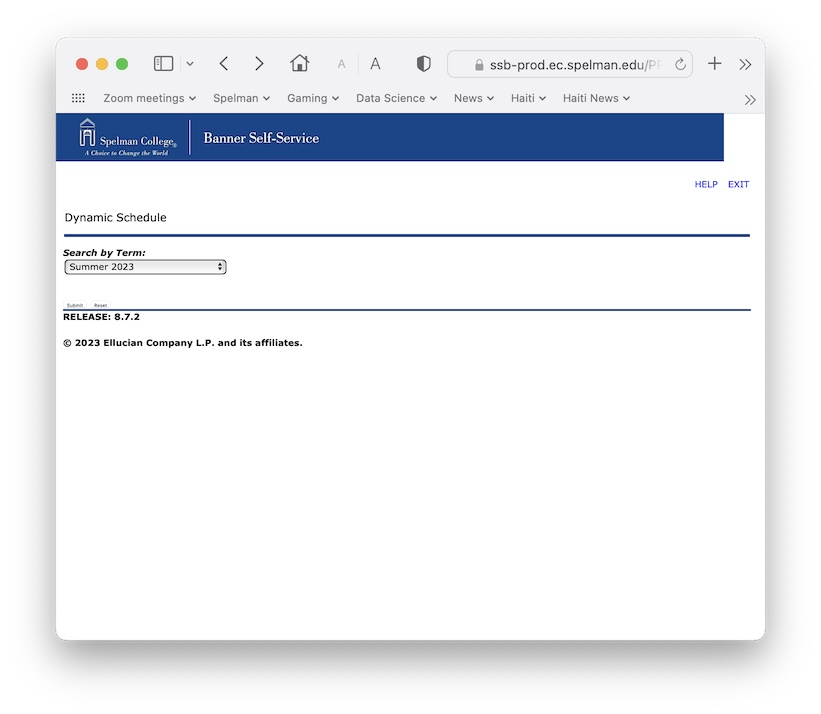


<br>

**p_proc_term_date**

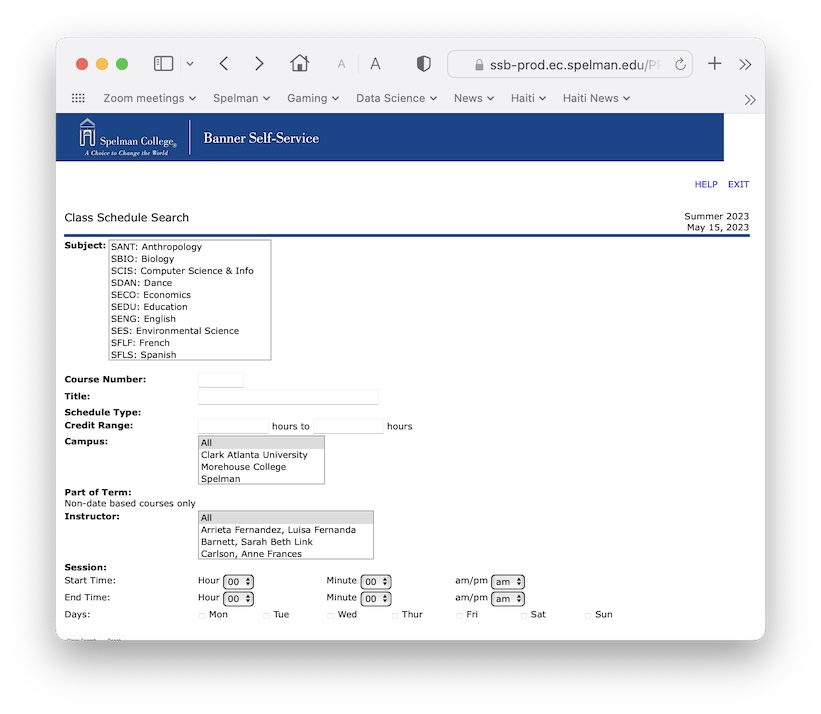

<br>

**p_get_crse_unsec**

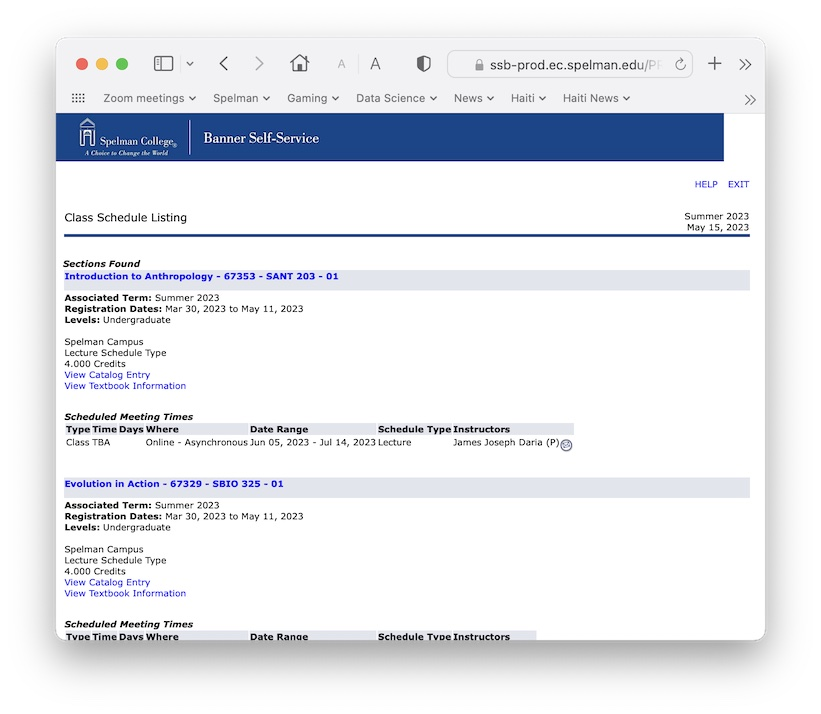

# Debug

In [228]:
#Set DEBUG to True to generate debug info and operate off-line.
#When True, static Prefix and Courses debug data from the Spelman Spring 2023 
#semester will be used instead of live data.
DEBUG = False

## Prefixes Debug Data

In [229]:
#Prefix Debug Data (Spring 2023)
if (DEBUG):
  SP23_prefixes = [{"value" : "SADS"}, {"value" : "SADW"}, {"value" : "SANT"}, {"value" : "SAS"}, {"value" : "SASL"}, {"value" : "SAVC"}, {"value" : "SBIO"}, {"value" : "SBQC"}, {"value" : "SCHE"}, {"value" : "SCIS"}, {"value" : "SCWS"}, {"value" : "SDAN"}, {"value" : "SECO"}, {"value" : "SEDU"}, {"value" : "SENG"}, {"value" : "SENT"}, {"value" : "SERG"}, {"value" : "SES"}, {"value" : "SFLC"}, {"value" : "SFLF"}, {"value" : "SFLJ"}, {"value" : "SFLL"}, {"value" : "SFLP"}, {"value" : "SFLS"}, {"value" : "SFYE"}, {"value" : "SGIS"}, {"value" : "SHIS"}, {"value" : "SHSP"}, {"value" : "SHUV"}, {"value" : "SIS"}, {"value" : "SLDR"}, {"value" : "SMAT"}, {"value" : "SMGT"}, {"value" : "SMUS"}, {"value" : "SPHI"}, {"value" : "SPHY"}, {"value" : "SPSC"}, {"value" : "SPSY"}, {"value" : "SREL"}, {"value" : "SSOC"}, {"value" : "STHR"}, {"value" : "SWEL"}]

## Courses Debug Data



In [230]:
#Courses data (Spring 2023)
if (DEBUG):
  SP23_html = '''<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/transitional.dtd">
<HTML lang="en">
<head>
<META http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta http-equiv="Pragma" name="Cache-Control" content="no-cache">
<meta http-equiv="Cache-Control" name="Cache-Control" content="no-cache">
<LINK REL="stylesheet" HREF="/css/web_defaultapp.css" TYPE="text/css">
<LINK REL="stylesheet" HREF="/css/web_defaultprint.css" TYPE="text/css" media="print">
<title>Class Schedule Listing</title>
<meta http-equiv="Content-Script-Type" name="Default_Script_Language" content="text/javascript">
<SCRIPT LANGUAGE="JavaScript" TYPE="text/javascript">
<!-- Hide JavaScript from older browsers 
window.onunload = function() {submitcount=0;}
var submitcount=0;
function checkSubmit() {
if (submitcount == 0)
   {
   submitcount++;
   return true;
   }
else
   {
alert("Your changes have already been submitted.");
   return false;
   }
}
//  End script hiding -->
</SCRIPT>
<SCRIPT LANGUAGE="JavaScript" TYPE="text/javascript">
<!-- Hide JavaScript from older browsers 
//  Function to open a window
function windowOpen(window_url) {
   helpWin = window.open(window_url,'','toolbar=yes,status=no,scrollbars=yes,menubar=yes,resizable=yes,directories=no,location=no,width=350,height=400');
   if (document.images) { 
       if (helpWin) helpWin.focus()
   }
}
//  End script hiding -->
</SCRIPT>
</head>
<body>
<div class="headerwrapperdiv">
<div class="pageheaderdiv1">
<a href="#main_content" onMouseover="window.status='Go to Main Content'; return true" onMouseout="window.status=''; return true" OnFocus="window.status='Go to Main Content'; return true" onBlur="window.status=''; return true" class="skiplinks">Go to Main Content</a>
<h1>Spelman College</h1></DIV><div class="headerlinksdiv">
</DIV>
<table  CLASS="plaintable" SUMMARY="This table displays Menu Items and Banner Search textbox." WIDTH="100%">
<tr>
<TD CLASS="pldefault">
<div class="headerlinksdiv2">
&nbsp;
</div>
</TD>
<TD CLASS="pldefault"><p class="rightaligntext" /p>
<SPAN class="pageheaderlinks">
<a href="/wtlhelp/twbhhelp.htm" accesskey="H" onClick="popup = window.open('/wtlhelp/twbhhelp.htm', 'PopupPage','height=500,width=450,scrollbars=yes,resizable=yes'); return false" target="_blank" onMouseOver="window.status='';  return true" onMouseOut="window.status=''; return true"onFocus="window.status='';  return true" onBlur="window.status=''; return true"  class="submenulinktext2">HELP</a>
|
<a href="twbkwbis.P_Logout" accesskey="3" class="submenulinktext2">EXIT</a>
</span>
</TD>
</tr>
</table>
</DIV>
<div class="pagetitlediv">
<table  CLASS="plaintable" SUMMARY="This table displays title and static header displays." WIDTH="100%">
<tr>
<TD CLASS="pldefault">
<h2>Class Schedule Listing</h2>
</TD>
<TD CLASS="pldefault">
&nbsp;
</TD>
<TD CLASS="pldefault"><p class="rightaligntext" /p>
<div class="staticheaders">
Spring 2023<br>
Jun 04, 2023<br>
</div>
</TD>
</tr>
<tr>
<TD class="bg3" width="100%" colSpan=3><img src="/wtlgifs/web_transparent.gif" alt="Transparent Image" CLASS="headerImg" TITLE="Transparent Image"  NAME="web_transparent" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=3 WIDTH=10 /></TD>
</tr>
</table>
<a name="main_content"></a>
</DIV>
<div class="pagebodydiv">
<!--  ** END OF twbkwbis.P_OpenDoc **  -->
<br />

<input type="hidden" name="sel_crn" value="dummy" />
<input type="hidden" name="assoc_term_in" value="dummy" />
<input type="hidden" name="ADD_BTN" value="dummy" />
<table  CLASS="datadisplaytable" SUMMARY="This layout table is used to present the sections found" width="100%"><caption class="captiontext">Sections Found</caption>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11727">Principles of Computing - 11727 - SCIS 105 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=105&amp;sel_crse_end=105&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=105&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">11:00 am - 11:50 am</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall 226</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Monteusz   Monroe (<ABBR title= "Primary">P</ABBR>)<a href="mailto:monteuszmonroe@spelman.edu"    target="Monteusz Monroe" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11728">Principles of Computing - 11728 - SCIS 105 - 02</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=105&amp;sel_crse_end=105&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=105&amp;p_seq_in=02">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">10:00 am - 10:50 am</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall 226</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Monteusz   Monroe (<ABBR title= "Primary">P</ABBR>)<a href="mailto:monteuszmonroe@spelman.edu"    target="Monteusz Monroe" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11940">Principles of Computing - 11940 - SCIS 105 - 03</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=105&amp;sel_crse_end=105&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=105&amp;p_seq_in=03">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">1:00 pm - 1:50 pm</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall 226</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Jaye   Nias (<ABBR title= "Primary">P</ABBR>)<a href="mailto:jnias@spelman.edu"    target="Jaye Nias" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11729">Principles of Computing - 11729 - SCIS 105 - 04</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=105&amp;sel_crse_end=105&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=105&amp;p_seq_in=04">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">6:00 pm - 7:15 pm</td>
<td CLASS="dddefault">MW</td>
<td CLASS="dddefault">Online </td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Blanche L.  Edwards (<ABBR title= "Primary">P</ABBR>)<a href="mailto:blancheb@spelman.edu"    target="Blanche L. Edwards" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a>, Beverly Ann  McCrary <a href="mailto:bmccrary@spelman.edu"    target="Beverly A. McCrary" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11766">Principles of Computing - 11766 - SCIS 105 - 05</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=105&amp;sel_crse_end=105&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=105&amp;p_seq_in=05">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">2:00 pm - 2:50 pm</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall </td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Jaye   Nias (<ABBR title= "Primary">P</ABBR>)<a href="mailto:jnias@spelman.edu"    target="Jaye Nias" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11468">Discovering Computer Science - 11468 - SCIS 111 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=111&amp;sel_crse_end=111&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=111&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">9:25 am - 10:40 am</td>
<td CLASS="dddefault">TR</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Sandrilla   Washington (<ABBR title= "Primary">P</ABBR>)<a href="mailto:Sandrilla.Washington@spelman.edu"    target="Sandrilla Washington" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
<tr>
<td CLASS="dddefault">Lab</td>
<td CLASS="dddefault">2:25 pm - 3:40 pm</td>
<td CLASS="dddefault">T</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Sandrilla   Washington (<ABBR title= "Primary">P</ABBR>)<a href="mailto:Sandrilla.Washington@spelman.edu"    target="Sandrilla Washington" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11580">Discovering Computer Science - 11580 - SCIS 111 - 02</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=111&amp;sel_crse_end=111&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=111&amp;p_seq_in=02">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">1:00 pm - 2:15 pm</td>
<td CLASS="dddefault">TR</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Sandrilla   Washington (<ABBR title= "Primary">P</ABBR>)<a href="mailto:Sandrilla.Washington@spelman.edu"    target="Sandrilla Washington" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
<tr>
<td CLASS="dddefault">Lab</td>
<td CLASS="dddefault">3:50 pm - 5:05 pm</td>
<td CLASS="dddefault">R</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Sandrilla   Washington (<ABBR title= "Primary">P</ABBR>)<a href="mailto:Sandrilla.Washington@spelman.edu"    target="Sandrilla Washington" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11618">Discovering Computer Science - 11618 - SCIS 111 - 03</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=111&amp;sel_crse_end=111&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=111&amp;p_seq_in=03">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">1:00 pm - 1:50 pm</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Monteusz   Monroe (<ABBR title= "Primary">P</ABBR>)<a href="mailto:monteuszmonroe@spelman.edu"    target="Monteusz Monroe" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
<tr>
<td CLASS="dddefault">Lab</td>
<td CLASS="dddefault">2:00 pm - 3:15 pm</td>
<td CLASS="dddefault">M</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Monteusz   Monroe (<ABBR title= "Primary">P</ABBR>)<a href="mailto:monteuszmonroe@spelman.edu"    target="Monteusz Monroe" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=12347">Discovering Computer Science - 12347 - SCIS 111 - 04</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=111&amp;sel_crse_end=111&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=111&amp;p_seq_in=04">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">10:00 am - 10:50 am</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Sandrilla   Washington (<ABBR title= "Primary">P</ABBR>)<a href="mailto:Sandrilla.Washington@spelman.edu"    target="Sandrilla Washington" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a>, Raquel Loran  Hill <a href="mailto:raquel.hill@spelman.edu"    target="Raquel L. Hill" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
<tr>
<td CLASS="dddefault">Lab</td>
<td CLASS="dddefault">3:00 pm - 4:15 pm</td>
<td CLASS="dddefault">W</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Sandrilla   Washington (<ABBR title= "Primary">P</ABBR>)<a href="mailto:Sandrilla.Washington@spelman.edu"    target="Sandrilla Washington" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a>, Raquel Loran  Hill <a href="mailto:raquel.hill@spelman.edu"    target="Raquel L. Hill" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11619">Computer Science I (C++) - 11619 - SCIS 121 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=121&amp;sel_crse_end=121&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=121&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">2:25 pm - 3:40 pm</td>
<td CLASS="dddefault">TR</td>
<td CLASS="dddefault">Tapley Hall 226</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Brandeis Hill  Marshall (<ABBR title= "Primary">P</ABBR>)<a href="mailto:bmarsha6@spelman.edu"    target="Brandeis H. Marshall" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
<tr>
<td CLASS="dddefault">Lab</td>
<td CLASS="dddefault">3:50 pm - 5:05 pm</td>
<td CLASS="dddefault">T</td>
<td CLASS="dddefault">Tapley Hall 226</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Brandeis Hill  Marshall (<ABBR title= "Primary">P</ABBR>)<a href="mailto:bmarsha6@spelman.edu"    target="Brandeis H. Marshall" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11632">Computer Science I - 11632 - SCIS 123 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=123&amp;sel_crse_end=123&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=123&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">2:25 pm - 3:40 pm</td>
<td CLASS="dddefault">TR</td>
<td CLASS="dddefault">Tapley Hall 223</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Andrea W  Lawrence (<ABBR title= "Primary">P</ABBR>)</td>
</tr>
<tr>
<td CLASS="dddefault">Lab</td>
<td CLASS="dddefault">3:50 pm - 5:05 pm</td>
<td CLASS="dddefault">T</td>
<td CLASS="dddefault">Tapley Hall 223</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Andrea W  Lawrence (<ABBR title= "Primary">P</ABBR>)</td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11266">Freshman Seminar II - 11266 - SCIS 182 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Seminar Schedule Type
<br />
       0.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=182&amp;sel_crse_end=182&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=182&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">12:00 pm - 12:50 pm</td>
<td CLASS="dddefault">R</td>
<td CLASS="dddefault">Science Center Building 232</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Seminar</td>
<td CLASS="dddefault">Andrea W  Lawrence (<ABBR title= "Primary">P</ABBR>)</td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=12475">Data Struct. & Theor Found CS - 12475 - SCIS 215 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=215&amp;sel_crse_end=215&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=215&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">1:00 pm - 2:15 pm</td>
<td CLASS="dddefault">TR</td>
<td CLASS="dddefault">Tapley Hall 223</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Raquel Loran  Hill (<ABBR title= "Primary">P</ABBR>)<a href="mailto:raquel.hill@spelman.edu"    target="Raquel L. Hill" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
<tr>
<td CLASS="dddefault">Lab</td>
<td CLASS="dddefault">3:50 pm - 5:05 pm</td>
<td CLASS="dddefault">T</td>
<td CLASS="dddefault">Tapley Hall 223</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Raquel Loran  Hill (<ABBR title= "Primary">P</ABBR>)<a href="mailto:raquel.hill@spelman.edu"    target="Raquel L. Hill" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11585">Data Structures & Algorithm - 11585 - SCIS 313 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=313&amp;sel_crse_end=313&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=313&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">9:25 am - 10:40 am</td>
<td CLASS="dddefault">TR</td>
<td CLASS="dddefault">Tapley Hall 226</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Andrea W  Lawrence (<ABBR title= "Primary">P</ABBR>)</td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11417">Intro Database Mang Sys Design - 11417 - SCIS 328 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=328&amp;sel_crse_end=328&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=328&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">1:00 pm - 2:15 pm</td>
<td CLASS="dddefault">TR</td>
<td CLASS="dddefault">Tapley Hall 226</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Brandeis Hill  Marshall (<ABBR title= "Primary">P</ABBR>)<a href="mailto:bmarsha6@spelman.edu"    target="Brandeis H. Marshall" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11402">Operating Sys/Computer Archite - 11402 - SCIS 343 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=343&amp;sel_crse_end=343&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=343&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">11:00 am - 11:50 am</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Raquel Loran  Hill (<ABBR title= "Primary">P</ABBR>)<a href="mailto:raquel.hill@spelman.edu"    target="Raquel L. Hill" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
<tr>
<td CLASS="dddefault">Lab</td>
<td CLASS="dddefault">12:00 pm - 12:50 pm</td>
<td CLASS="dddefault">W</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Raquel Loran  Hill (<ABBR title= "Primary">P</ABBR>)<a href="mailto:raquel.hill@spelman.edu"    target="Raquel L. Hill" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=12476">Introduction to Robotics - 12476 - SCIS 435 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=435&amp;sel_crse_end=435&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=435&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">2:00 pm - 2:50 pm</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall 223</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Monteusz   Monroe (<ABBR title= "Primary">P</ABBR>)<a href="mailto:monteuszmonroe@spelman.edu"    target="Monteusz Monroe" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a>, Raquel Loran  Hill <a href="mailto:raquel.hill@spelman.edu"    target="Raquel L. Hill" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=12477">Human Computer Interaction - 12477 - SCIS 456 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Lecture Schedule Type
<br />
       4.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=456&amp;sel_crse_end=456&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=456&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">10:00 am - 10:50 am</td>
<td CLASS="dddefault">MWF</td>
<td CLASS="dddefault">Tapley Hall 223</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Lecture</td>
<td CLASS="dddefault">Jaye   Nias (<ABBR title= "Primary">P</ABBR>)<a href="mailto:jnias@spelman.edu"    target="Jaye Nias" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
<tr>
<th CLASS="ddtitle" scope="colgroup" ><a href="/PROD/bwckschd.p_disp_detail_sched?term_in=202301&amp;crn_in=11604">Senior Seminar I - 11604 - SCIS 481 - 01</a></th>
</tr>
<tr>
<TD CLASS="dddefault">
<SPAN class="fieldlabeltext">Associated Term: </SPAN>Spring 2023 
<br />
<SPAN class="fieldlabeltext">Registration Dates: </SPAN>Nov 03, 2022 to Jan 27, 2023 
<br />
<SPAN class="fieldlabeltext">Levels: </SPAN>Undergraduate 
<br />
<br />
Spelman Campus
<br />
Seminar Schedule Type
<br />
       0.000 Credits
<br />
<a href="/PROD/bwckctlg.p_display_courses?term_in=202301&amp;one_subj=SCIS&amp;sel_crse_strt=481&amp;sel_crse_end=481&amp;sel_subj=&amp;sel_levl=&amp;sel_schd=&amp;sel_coll=&amp;sel_divs=&amp;sel_dept=&amp;sel_attr=">View Catalog Entry</a>
<br />
<a href="/PROD/bwckbook.site?p_term_in=202301&amp;p_subj_in=SCIS&amp;p_crse_numb_in=481&amp;p_seq_in=01">View Textbook Information</a>
<br />
<br />
<table  CLASS="datadisplaytable" SUMMARY="This table lists the scheduled meeting times and assigned instructors for this class.."><caption class="captiontext">Scheduled Meeting Times</caption>
<tr>
<th CLASS="ddheader" scope="col" >Type</th>
<th CLASS="ddheader" scope="col" >Time</th>
<th CLASS="ddheader" scope="col" >Days</th>
<th CLASS="ddheader" scope="col" >Where</th>
<th CLASS="ddheader" scope="col" >Date Range</th>
<th CLASS="ddheader" scope="col" >Schedule Type</th>
<th CLASS="ddheader" scope="col" >Instructors</th>
</tr>
<tr>
<td CLASS="dddefault">Class</td>
<td CLASS="dddefault">12:00 pm - 12:50 pm</td>
<td CLASS="dddefault">R</td>
<td CLASS="dddefault">Tapley Hall 227</td>
<td CLASS="dddefault">Jan 18, 2023 - May 03, 2023</td>
<td CLASS="dddefault">Seminar</td>
<td CLASS="dddefault">Brandeis Hill  Marshall (<ABBR title= "Primary">P</ABBR>)<a href="mailto:bmarsha6@spelman.edu"    target="Brandeis H. Marshall" ><img src="/wtlgifs/web_email.gif" align="middle" alt="E-mail" CLASS="headerImg" TITLE="E-mail"  NAME="web_email" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=28 WIDTH=28 /></a></td>
</tr>
</table>
<br />
<br />
</TD>
</tr>
</table>
<br />
<table  CLASS="datadisplaytable" summary="This is for formatting of the bottom links." WIDTH="50%">
<tr>
<TD CLASS="ntdefault">
<a href="javascript:history.go(-1)" onMouseOver="window.status='Return to Previous';  return true" onFocus="window.status='Return to Previous';  return true" onMouseOut="window.status='';  return true"onBlur="window.status='';  return true">Return to Previous</a>
</TD>
</tr>
</table>

<!--  ** START OF twbkwbis.P_CloseDoc **  -->
<table  CLASS="plaintable" SUMMARY="This is table displays line separator at end of the page." WIDTH="100%" cellSpacing=0 cellPadding=0 border=0><tr><TD class="bgtabon" width="100%" colSpan=2><img src="/wtlgifs/web_transparent.gif" alt="Transparent Image" CLASS="headerImg" TITLE="Transparent Image"  NAME="web_transparent" HSPACE=0 VSPACE=0 BORDER=0 HEIGHT=3 WIDTH=10 /></TD></tr></table>
<a href="#top" onMouseover="window.status='Skip to top of page'; return true" onMouseout="window.status=''; return true" OnFocus="window.status='Skip to top of page'; return true" onBlur="window.status=''; return true" class="skiplinks">Skip to top of page</a>
</DIV>
<div class="footerbeforediv">

</DIV>
<div class="footerafterdiv">

</DIV>
<div class="globalafterdiv">

</DIV>
<div class="globalfooterdiv">

</DIV>
<div class="pagefooterdiv">
<SPAN class="releasetext">Release: 8.7.2</SPAN>
</DIV>
<div class="poweredbydiv">
</DIV>
<DIV class="div1"></DIV>
<DIV class="div2"></DIV>
<DIV class="div3"></DIV>
<DIV class="div4"></DIV>
<DIV class="div5"></DIV>
<DIV class="div6"></DIV>
<div class="banner_copyright"> <br><h5>© 2023 Ellucian Company L.P. and its affiliates.<br></h5></div>
</body>
</html>
'''

# Init

In [231]:
import ipywidgets as widgets
#The UI consistes of a top-level HBox called mainHBox.
#Here, we will create the contents that will go into this top-level HBox.

#This function creates the framework for the main UI.  That is, it organizes
#empty widgets on the mainHBox widget.  The init() function (called in or near
#the last cell of the notebook) populates descriptive labels and default 
#values in these widgets.
def mainUI():
  #specify the global elements of the UI
  global school, subjects, semester, year, levels, message, BtnSubmit, BtnExecute, BtnDownload, timeBinSize, histogramOutput
  global console_

  #create empty containers for the global UI elements
  school = widgets.Dropdown()
  subjects = []
  for i in range(6):
    subjects.append(widgets.SelectMultiple())
  year = widgets.IntText()
  semester = widgets.Dropdown()
  levels = []
  for i in range(6):
    levels.append(widgets.Text())
  message = widgets.Text()
  BtnSubmit = widgets.Button()
  BtnExecute = widgets.Button()
  BtnDownload = widgets.Button()
  timeBinSize = widgets.Dropdown()
  histogramOutput = widgets.HTML()
  console_ = widgets.Textarea()
  console_.layout = widgets.Layout(width='100%', height='400px')

  #we will organize the UI as a vertical stack of boxes
  #Here, we define the boxes in the stack
  box0 = widgets.Box([widgets.HTML('''<h3><b style="color:#6080ff;">&nbsp Step 0:</b> \
  Run All</h3>Begin by running all cells.  Press Ctrl-F9 or select <i>Runtime->Run all</i>  \
  from the menu.  You need to do this one time only.  Then, follow steps 1-3 below.  \
  You can find additional usage details in the README section below.  \
  Forward questions to <i>jvolcy@spelman.edu</i>.''')])

  box0.layout = {'border':'1px solid lightgray', 'padding':'10px'}

  box1 = widgets.Box([school, year, semester, BtnSubmit])
  vbox1 = widgets.VBox([widgets.HTML('<h3><b style="color:#6080ff;">&nbsp Step 1:</b> Select School/Year/Semester</h3>'),
          box1])
  vbox1.layout = {'border':'1px solid lightgray', 'padding':'10px'}

  box2a = widgets.Box([subjects[0], levels[0],subjects[1], levels[1],subjects[2], levels[2]])
  box2b = widgets.Box([subjects[3], levels[3],subjects[4], levels[4],subjects[5], levels[5]])
  vbox2 = widgets.VBox([widgets.HTML('<h3><b style="color:#6080ff;"><sp\>&nbsp Step 2:</b> Select Subjects & Level Filters</h3>'), 
          box2a,
          box2b,])
  vbox2.layout = {'border':'1px solid lightgray', 'padding':'10px'}

  box2a = widgets.Box([timeBinSize, BtnExecute])
  box3 = widgets.Box([message])
  vbox3 = widgets.VBox([widgets.HTML('<h3><b style="color:#6080ff;"><sp\>&nbsp Step 3:</b> Analyze</h3>'),
          box2a,
          box3])
  vbox3.layout = {'border':'1px solid lightgray', 'padding':'10px'}
  box4 = widgets.Box([histogramOutput, BtnDownload])
  box4.layout = {'border':'1px solid lightgray', 'padding':'10px'}
  box5 = widgets.Box([console_])
  box5.layout = {'border':'1px solid lightgray', 'padding':'10px'}

  #Create the vertical stack of UI boxes
  ui = widgets.VBox([box0, vbox1, vbox2, vbox3, box4, box5])

  
  #return the completed UI
  return(ui)

#mainHBox.layout = widgets.Layout(border_width='1', border_style='normal', border_color='red')
#Add the compelted UI to the mainHBox
mainHBox.children = [mainUI()]

def console(item, override=False):
  global console_
  if (DEBUG == False and override == False): return
  console_.value += str(item) + '\n'

def ClearConsole():
  global console_
  console_.value = ""


In [232]:
import datetime
import requests   #for requests.get()/post()
import ipywidgets as widgets

def resetFilterLevels():
  global levels
  for level in levels:
    level.description = 'Lvl Filter:'
    level.value = '*'
    level.layout = widgets.Layout(width='150px')


def init():
  global school, subjects, semester, year, levels, message, BtnSubmit, BtnExecute, BtnDownload, timeBinSize
  global histogramHTML, levelFilters

  #School
  #list of known school Ellucian Dynamic Schedule sites
  school.description = 'School:'
  school.options = [
          ('Spelman', 'https://ssb-prod.ec.spelman.edu/PROD/'),
          ('Morehouse', 'https://ssb-prod.ec.morehouse.edu/MC/'),
          ('CAU', 'https://ssb-prod.ec.cau.edu/PROD/')
          ]
          
          #('*Georgia State', 'https://www.gosolar.gsu.edu/bprod/'),
          #('*Georgia Tech', 'https://oscar.gatech.edu/pls/bprod/'),
          #('*KSU', 'https://owlexpress.kennesaw.edu/prodban/'),
          #('*UGA', 'https://sis-ssb-prod.uga.edu/PROD/')

  for subject in subjects:
    subject.description = 'Subjs:'
    subject.layout = widgets.Layout(width='150px')

  #Message  
  message.value = 'Ready.'
  message.layout = widgets.Layout(width='80%')
  message.description = ' '
  message.disabled = True
  message.layout.align_items = 'center'

  #Semester
  #Note that the different schools use different encodings for the spring,
  #summer,fall and winter semesters:
  #School                 Encoding (month)
  #spelamn/Morehous/CAU   01, 06, 09, 12
  #gsu/KSU                01, 05, 08
  #GTech/UGA              02, 05, 08
  semester.description = 'Semester:'
  semester.options = [
          ('Spring', '01'),
          ('Summer', '06'),
          ('Fall', '09'),
          ('Winter', '12'),
        ]
  semester.layout = widgets.Layout(width='200px')

  #Year
  year.description = 'Year:'
  year.value = datetime.date.today().year
  year.layout = widgets.Layout(width='200px')

  #level filter
  resetFilterLevels()

  #Submit Button
  BtnSubmit.description = 'Update Subjects'
  BtnSubmit.button_style = 'primary'
  BtnSubmit.on_click(BtnSubmitClicked)

  #Execute Button
  BtnExecute.description = 'Execute'
  BtnExecute.button_style = ''
  BtnExecute.on_click(BtnExecuteClicked)
  BtnExecute.disabled = True
  BtnExecute.layout = widgets.Layout(width='40%')

  #Download Button
  BtnDownload.description = 'Download'
  BtnDownload.button_style = ''
  BtnDownload.on_click(BtnDownloadClicked)
  BtnDownload.disabled = True

  #Time Bin
  timeBinSize.description = 'Time Bins:'
  timeBinSize.options = [
          ('5 minutes', 5),
          ('10 minutes', 10),
          ('15 minutes', 15),
          ('30 minutes', 30),
          ('60 minutes', 60)
        ]
  timeBinSize.value = 30
  #timeBinSize.layout = widgets.Layout(width='200px')

  ClearConsole()

def ClearSubjects():
  global subjects
  for subject in subjects:
    subject.options = tuple()


def AddSubjects(listOfSubjects):
  global subjects
  for subject in subjects:
    subject.options += tuple(listOfSubjects)



# HTML Scraping

## Get/Scrape p_proc_term_date to get course prefixes

In [233]:
from bs4 import BeautifulSoup

def Get_PProcTermDate_Html():
  #Note that this function will fail for schools that don't use the
  #same semester designations found in the semester dropdown values.
  #Currently, this is set to use the Sp=01,Su=06,F=09,W=12 designations only.
  #For schools that use different designations (GTech, KSU, GSU, UGA),
  #the p_term will be invalid.  This is an easy fix if we ever want to
  #add the logic to make the the semesters dropdown options dependent on
  #the selected school.  All AUC schools use 01,06,09,12 start of 
  #semester designations.
  url = school.value + 'bwckgens.p_proc_term_date'
  data = {'p_calling_proc':'bwckschd.p_disp_dyn_sched', 'p_term':str(year.value)+semester.value}
  
  headers = dict()
  headers["Content-Type"] = "application/x-www-form-urlencoded"

  resp = requests.post(url, headers=headers, data=data)
  return resp.text


def ScrapeCoursePrefixesFrom_PProcTermDate(html):
  #This function scrapes course prefixes from the p_proc_term_date page and
  #appends them to the subjects dropdown.  Previous contents of the
  #subjects dropdown are cleared.

  #create a pageSoup object from the raw html
  pageSoup = BeautifulSoup(html)

  #find the subject select option.  Its ID is subj_id.
  subj_id = pageSoup.find(id="subj_id")

  #find all options in the selector
  prefixes = subj_id.find_all("option")

  return prefixes



## Get/Scrape p_get_crse_unsec

### Get the p_get_crse_unsec page html

In [234]:

def _Build_PGetCrseUnsec_PostString():
  #This function creates the POST payload string for the p_get_crse_unsec page.
  #PostData="term_in=202306&sel_subj=dummy&sel_day=dummy&sel_schd=dummy&sel_insm=dummy&sel_camp=dummy&sel_levl=dummy&sel_sess=dummy&sel_instr=dummy&sel_ptrm=dummy&sel_attr=dummy&sel_subj=SECO&sel_subj=SEDU&sel_subj=SENG&sel_crse=&sel_title=&sel_from_cred=&sel_to_cred=&sel_camp=S&sel_instr=%25&begin_hh=0&begin_mi=0&begin_ap=a&end_hh=0&end_mi=0&end_ap=a"

  #campus='S'  #set to Spelman
  campus = ''  #set to all
  PostData=f"term_in={str(year.value)+semester.value}&sel_subj=dummy&"
  PostData += f"sel_day=dummy&sel_schd=dummy&sel_insm=dummy&sel_camp=dummy&"
  PostData += f"sel_levl=dummy&sel_sess=dummy&sel_instr=dummy&sel_ptrm=dummy&sel_attr=dummy&"

  #collect all prefixes
  prefixes = set()
  for subject in subjects:
    prefixes.update(subject.value)

  for prefix in prefixes:
    PostData += f"sel_subj={prefix}&"

  PostData += f"sel_crse=&sel_title=&sel_from_cred=&sel_to_cred=&sel_camp={campus}&sel_instr=%25&sel_levl=&sel_sess=&"
  PostData += f"begin_hh=0&begin_mi=0&begin_ap=a&end_hh=0&end_mi=0&end_ap=a"

  return PostData


def Get_PGetCrseUnsec_HTML():
  #This function returns the p_get_crse_unsec page HTML course listing.
  #url = 'https://ssb-prod.ec.spelman.edu/PROD/bwckschd.p_get_crse_unsec'
  url = school.value + 'bwckschd.p_get_crse_unsec'
  PostData = _Build_PGetCrseUnsec_PostString()
  console(f'URL = {url}')
  console(f'PostData = {PostData}')

  headers = dict()
  headers["Content-Type"] = "application/x-www-form-urlencoded"

  resp = requests.post(url, headers=headers, data=PostData)
  return resp.text


#html = Get_PGetCrseUnsec_HTML()



### Scrape courses from p_get_crse_unsec html

In [235]:
from bs4 import BeautifulSoup

def _GetCourseInfoFromTableHeaders(TableHeaders):
  #TableHeaders is a soup page of the course info table found in the
  #p_get_crse_unsec page.
  #get the contents of the anchor in the header.  This is a string
  #that we must analyze
  courses = []

  for i in range(len(TableHeaders)):
    course = dict()
    dataStr = TableHeaders[i].find('a').contents[0]
    dataList = dataStr.split('-')
    #go through the list starting from the end (we need to be careful about
    #course names that contain a '-' character).
    course['Section'] = dataList[-1].strip()
    #split the course name into a prefix and course number
    courseName = dataList[-2].strip().split(' ')
    course['Course Number'] = courseName[1].strip()
    course['Course Prefix'] = courseName[0].strip()
    course['CRN'] = dataList[-3].strip()
    course['Name'] = '-'.join(dataList[0:-3]).strip()
    courses.append(course)
    #print(course)
  return courses

def GetCourses(html):
  #This code is fragile.  It is difficult to tell if it will work for all
  #cases.  It is unlikely to work for sites other than Spelman.  It will
  #surely break if Ellucian updates Banner and the underlying html format
  #changes.

  #create a pageSoup object from the raw html
  pageSoup = BeautifulSoup(html)

  #find the main table
  #The main table contains all the course data.  We identify it with its
  #class: "datadisplaytable".  "datadisplaytable" is also the class associated
  #with subtables, making for some ambiguity.  I believe that the first table
  #that find() returns will be the parent table.  Using this assumption, the
  #call to find() from the level of the html document should return the top
  #level table.  We call this MainTable in the code below.
  MainTable = pageSoup.find("table", class_="datadisplaytable") #this is the top level table

  #The MainTable contains a header/data pair for each course.  These appear in
  #alternating <tr> rows.  The first and alternating rows contains header data 
  #in a <th> tag.  The headers contain the course name, CRN, prefix, course 
  #number and section as a single string.
  #The second and alternative <tr> rows contain sub-tables (<table>) which
  #in turn contan data on course days, time, instructor, location, date, etc. 
  #Not every <th> has a corresponding sub <table>.  But every sub <table> has
  #eactly one correspondng <th>.  We will need to individually poll each <tr>
  #to create (<th>,<table>) pairs.  Sometimes, this will be a (<th>,None) pair.


  #first, let's find all the <tr>s in the main table
  TableRows = MainTable.find_all("tr", recursive=False)

  #if there is a single table row, then most likely, no courses match the search.
  if (len(TableRows) < 2):
    print('No courses were found.')
    return;

  #do a sanity check--> there should be an even number of <tr> tags in the main table
  if (len(TableRows) % 2 != 0):
    print(f'Something is wrong.  There should be an even number of <tr> entries in the main table.  But, only {len(TableRows)} were found.')
    return;

  TableHeaders = []
  SubTable = []

  #now, go through the list of <tr>s 2 at a time
  for i in range(0, len(TableRows), 2):
    th = TableRows[i].find("th", recursive=True)
    TableHeaders.append(th)
    st = TableRows[i+1].find("table", recursive=True)
    SubTable.append(st)

  #print(TableHeaders)
  #print(SubTable)

  #do a sanity check to verify that we have the same number of headers as we
  #have data sub-tables
  if (len(TableHeaders) != len(SubTable)):
    print(f"Something is wrong.  There are {len(TableHeaders)} headers in the main table.  But, there are {len(SubTable)} data sub-tables.")

  courses2 = []
  courses = _GetCourseInfoFromTableHeaders(TableHeaders)

  #The subtables contain data and corresponding data headers (not to be
  #confused with the table headers).  The data headers include "Type" (lecture,
  #for example), "Time" (class times), "Days" (class days), "Where" (room),
  #"Date Range" (semester start/stop dates), "Schedule Type" and "Instructor"
  #information.  By contrast, the main table header contains the course name,
  #CRN, prefix and section number.

  for i in range(len(courses)):
    #retrieve the header and data for each sub-table.  There is 1 sub-table
    #for each CRN

    #If this is one of the cases where we had a <th> header but no <table>
    #just skip it
    if (SubTable[i] == None):
      print(f"Skipping CRN:{courses[i]['CRN']} {courses[i]['Course Prefix']} {courses[i]['Course Number']} - {courses[i]['Name']}... No scheduling information found.")
      continue

    subTableHeaders = SubTable[i].find_all("th") #headers for the sub-tables
    subTableData = SubTable[i].find_all("td")

    #In some cases, we have multiple day/time entries for a single course.
    #This happens, for example, if a class meets in different rooms on
    #different days.  In such cases, the # of subTableHeaders will not equal
    #the # of subTableData structures.  Instead, the # of data structures 
    #will be a multiple of the # of headers.  So, if we have 7 items in the
    #header, we expect that we will have 7, 14, 21, etc items in the data.
    if (len(subTableData)%len(subTableHeaders) != 0):
      #print(f"Something is wrong.  There are {len(subTableHeaders)} entries in sub-table {i}.  But, there are {len(subTableData)} data elements.")
      #return
      print(f"CRN:{courses[i]['CRN']} {courses[i]['Course Prefix']} {courses[i]['Course Number']} - {courses[i]['Name']} table data malformed.  ", end='')
      print(f"There are {len(subTableHeaders)} data headers for this course, but, there are {len(subTableData)} data elements....skipping.")
      continue


    #extract and match the header with the data... add the result to the
    #course dictionary
    courses2IndexStartLen = len(courses2)
    for j in range(len(subTableData)):
      subTableIndex = j//len(subTableHeaders)
      if (courses2IndexStartLen + subTableIndex == len(courses2)):
        #print(f'{subTableIndex} Adding {courses[i]}')
        console(f'{subTableIndex} Adding {courses[i]}')
        courses2.append(dict(courses[i])) #make a copy of the courses dictionary
        #courses2[-1]["Time Seq"] = subTableIndex #this is how we will differentiate multiple time entries for a single course in the dictiohary

      headerContent=subTableHeaders[j%len(subTableHeaders)].contents[0].strip()
      data = str(subTableData[j].contents[0]).strip()

      #add the "Days" and "Time" data to the course dictionary

      if True:
        if (headerContent=="Days"):
          #courses[i][headerContent] = data
          courses2[-1][headerContent] = data
        if (headerContent=="Time"):
          #courses[i][headerContent] = data if data[0] in '0123456789' else ''
          courses2[-1][headerContent] = data if data[0] in '0123456789' else ''

      #print(f'Added {courses2[-1]}')

  #print(f"------{courses2}")
  return courses2





# Analytics

## Time

In [236]:
#Function to convert time to 24 hour format.
#The input to the function is a time string of
#the format "hh:mm xm", where 'xm' is either 'am' or 'pm'.
#The format of the input string allows for some flexibility.
#All of the following formats should work:
#"h:m XM", "h:mm Xm", "hh:mXM", "h:mxm", "hh:mmxm", etc.
#Required format elements include the presence of a single ":" between the
#hours and minutes, the absence of any seconds, the presence of a trailing
#"xm" term (which is case in-senstive).  The function returns a 4-character,
#24-hour formatted string in the form 'HHMM'.  The reply will be in the
#range '0000' to '2359'.
def convert24(str1):
  str1 = str1.strip()

  if (str1[-2:].upper() == 'PM'):
    pm = 12
  else:
    pm = 0

  t = str1[:-2].strip().split(':')
  h = int(t[0])

  if h == 12: #this is the midnight or noon hour.  In either case, add nothing to h
    h = 0
  
  h += pm  #hour
  m = int(t[1])  #minute

  return (f'{h:02d}{m:02d}')
  
#Create timebins of width binWidthMinutes.  The default is 15 minutes.
#The acceptable range of values is 1 to 60.  binWidthMinutes must be
#a factor of 60.  Acceptable values are 1, 2, 3, 4, 5, 6, 10, 12, 15,
#20, 30 and 60.
#timeBins[] is a list of time bin strings
#timeBinInts[] is a corresponding list of time bin integers
#timeBinInts is used to simplify comparison of times
def _MakeTimeBins(binWidthMinutes=15):
  global timeBins, timeBinInts, timeBinWidth
  timeBins = []
  timeBinInts = []
  timeBinWidth = int(binWidthMinutes)
  for h in range(24):
    for m in range(60//timeBinWidth):
      bin = f'{h:02d}{m*timeBinWidth:02d}'
      timeBins.append(bin)
      timeBinInts.append(int(bin))


#Function to determine the bin that the provided time belongs to.
#By default, we assume that the provided time is a start time
#(endTime=False).  In some cases, we want to find the bin given
#and end time.  For example, if we wanted to know the bins associated
#with the period of time from 1400 to 1500, we would need to find the
#bins associated with "1400" and "1500-", where the minus indicates
#an infinitesimally small time period before 1500.  In this case,
#1500 is the endtime for the period 1400-1500.  The bins of interest
#can be found with the following calls to findBin:
#   startTime = findBin('1400')
#   endTime = findBin('1500', endTime=True)
#The provide timeStr is expected to be in the HHMM 24-hour format
#in the range '0000' to '2359'
def findBin(timeStr, endTime=False):
  try:
    time1Int = int(timeStr)
  except:
    return -1
  if (time1Int < 0): return -1
  if (time1Int >= 2400): return -1

  for i in range(len(timeBinInts)-1):
    if (endTime):
      if (time1Int <= timeBinInts[i+1]):
        return i
    else:
      if (time1Int < timeBinInts[i+1]):
        return i
  return len(timeBinInts)-1


#_MakeTimeBins(30)

## Pandas: PrepareCoursesData()

In [237]:
import pandas as pd

#This function puts the data scraped from the p_get_crse_unsec HTML page
#into a Pandas dataframe (coursesDataFrame).
def _CreateCoursesDataFrame():
  global courses    #course data (list of dictionaries) scraped from the p_get_crse_unsec page HTML
  global coursesDataFrame #Pandas DF of courses data

  #First, we convert to a header/data structure: 
  #       coursesData = {'header':[], 'data':[]}
  #This format will make it easy to populate a Pandas dataframe.
  
  #Step 1 define the data structure
  coursesData = {'header':[], 'data':[]}  

  #Step 2 add the data header to the structure
  coursesData['header'] = list(courses[0].keys()) 

  #Step 3 filter and add the data to the structure
  for dataset in courses:
    if filterCourse(dataset):
      console(f"MATCHED: {dataset['Course Prefix']} {dataset['Course Number']}")
      coursesData['data'].append(list(dataset.values()))
    else:
      console(f"REJECTING {dataset['Course Prefix']} {dataset['Course Number']}")

  #Step 4 initialize the Pandas data frame with the header and data information
  #print("HEADER:" + str(coursesData['header']))
  #print("DATA" + str(coursesData['data']))
  coursesDataFrame = pd.DataFrame(coursesData['data'], columns=coursesData['header'])



#This function adds a "Level" column to the data frame.  This integer simply
#reflects the first digit of the course number, or None in the case that the
#value is absent or non-numeric.
def _AddLevelsToDataFrame():
  global coursesDataFrame #Pandas DF of courses data
  
  #Create the Level array
  Level = []
  #extract data from the data frame one row at a time
  #iloc allows integer-location based indexing of the DF
  for data in coursesDataFrame.iloc:
    try:
      #attempt to read and convert the first character in the 'Course Number' field
      lvl = int(data['Course Number'][0])
    except:
      #if the conversion fails for any reason, set the level to 'None'
      lvl = None
    Level.append(lvl) #append to the array

  #print(Level)

  #add to the data frame  
  coursesDataFrame['Level'] =  Level



#This function adds 2 columns, 'Start Time' and 'End Time' to the data frame.
#These 2 fields are formatted as 24-hour, 4 character 'HHMM' strings.  The
#values are extracted from the single 'Time' entry in the courses dictionary.
def _AddStartStopTimesToDataFrame():
  global coursesDataFrame #Pandas DF of courses data

  #create temporary StartTime and EndTime arrays
  StartTime = []
  EndTime = []
  #extract data from the data frame one row at a time
  for data in coursesDataFrame.iloc:
    try:
      #the start and end times are separated by a '-'
      t = data['Time'].split('-') #split start / end times
      StartTime.append(convert24(t[0])) #convert start time to 24-hr format
      EndTime.append(convert24(t[1])) #convert end time to 24-hr format
    except:
      #if anything goes wrong, set the start and stop times to 'None'
      StartTime.append(None)
      EndTime.append(None)

  #print(StartTime)
  #print(EndTime)

  #Add to the data frame
  coursesDataFrame['StartTime'] =  StartTime
  coursesDataFrame['EndTime'] =  EndTime


#This function adds time bins data to the DF
def _AddTimeBinsToDataFrame():
  global coursesDataFrame #Pandas DF of courses data
  global timeBins

  startBin = []
  endBin = []
  startBinName = []
  endBinName = []

  #extract data from the data frame one row at a time
  for data in coursesDataFrame.iloc:
    try:
      startBin_ = findBin(data['StartTime'], endTime=False)
      startBin.append(startBin_)
      startBinName.append(timeBins[startBin_])

      endBin_ = findBin(data['EndTime'], endTime=True)
      endBin.append(endBin_)
      endBinName.append(timeBins[endBin_])
    except:
      #if anything goes wrong, set the start and stop times to 'None'
      startBin.append(None)
      endBin.append(None)
      startBinName.append(None)
      endBinName.append(None)

  coursesDataFrame['StartBin'] = startBin
  coursesDataFrame['EndBin'] = endBin
  coursesDataFrame['StartBinName'] = startBinName
  coursesDataFrame['EndBinName'] = endBinName


def PrepareCoursesData():
  _CreateCoursesDataFrame()
  #display(coursesDataFrame)
  _AddLevelsToDataFrame()
  _AddStartStopTimesToDataFrame()
  _AddTimeBinsToDataFrame()

def DisplayCoursesDataFrame():
  global coursesDataFrame
  #display(coursesDataFrame)
  displayFormat = coursesDataFrame[["Name", "Course Prefix", "Course Number", "CRN", "Days", "StartTime", "EndTime"]]
  console(displayFormat.to_string(index=False), True)


#FOR DEVELOPMENT/DEBUG PURPOSES ONLY
#courses = [{'Section': '01', 'Course Number': '203', 'Course Prefix': 'SANT', 'CRN': '67353', 'Name': 'Introduction to Anthropology', 'Time': '', 'Days': ''}, {'Section': '01', 'Course Number': '325', 'Course Prefix': 'SBIO', 'CRN': '67329', 'Name': 'Evolution in Action', 'Time': '', 'Days': ''}, {'Section': '01', 'Course Number': '105', 'Course Prefix': 'SCIS', 'CRN': '67368', 'Name': 'Principles of Computing', 'Time': '8:00 am - 10:00 am', 'Days': 'TWR'}, {'Section': '01', 'Course Number': '105', 'Course Prefix': 'SDAN', 'CRN': '67354', 'Name': 'Dance Perspectives and Process', 'Time': '1:00 pm - 2:15 pm', 'Days': 'MW'}, {'Section': '01', 'Course Number': '375', 'Course Prefix': 'SECO', 'CRN': '67367', 'Name': 'Economics of Crime', 'Time': '3:00 pm - 6:00 pm', 'Days': 'W'}, {'Section': '01', 'Course Number': '387', 'Course Prefix': 'SECO', 'CRN': '67310', 'Name': 'Economics-Mgmt Practicum', 'Time': '6:00 pm - 7:15 pm', 'Days': 'TR'}, {'Section': '01', 'Course Number': '392', 'Course Prefix': 'SEDU', 'CRN': '67325', 'Name': 'Adult & Family Literacy', 'Time': '', 'Days': ''}, {'Section': '01', 'Course Number': '217', 'Course Prefix': 'SENG', 'CRN': '67361', 'Name': 'Intro to Popular Culture', 'Time': '12:00 pm - 3:00 pm', 'Days': 'TR'}, {'Section': '01', 'Course Number': '362', 'Course Prefix': 'SENG', 'CRN': '67355', 'Name': 'Feminist Film Criticism', 'Time': '2:00 pm - 4:00 pm', 'Days': 'MW'}, {'Section': '01', 'Course Number': '211', 'Course Prefix': 'SES', 'CRN': '67334', 'Name': 'Intro to Environmental Science', 'Time': '7:00 pm - 9:00 pm', 'Days': 'T'}, {'Section': '02', 'Course Number': '211', 'Course Prefix': 'SES', 'CRN': '67336', 'Name': 'Intro to Environmental Science', 'Time': '4:00 pm - 6:00 pm', 'Days': 'W'}, {'Section': '01', 'Course Number': '211L', 'Course Prefix': 'SES', 'CRN': '67335', 'Name': 'Intro to Envir Sci Lab', 'Time': '', 'Days': ''}, {'Section': '02', 'Course Number': '211L', 'Course Prefix': 'SES', 'CRN': '67337', 'Name': 'Intro to Envir Sci Lab', 'Time': '', 'Days': ''}, {'Section': '01', 'Course Number': '202', 'Course Prefix': 'SFLF', 'CRN': '67342', 'Name': 'Intermediate French II', 'Time': '6:00 pm - 7:15 pm', 'Days': 'TR'}, {'Section': '01', 'Course Number': '201', 'Course Prefix': 'SFLS', 'CRN': '67313', 'Name': 'Intermediate Spanish I', 'Time': '3:00 pm - 4:30 pm', 'Days': 'TW'}, {'Section': '01', 'Course Number': '202', 'Course Prefix': 'SFLS', 'CRN': '67314', 'Name': 'Intermediate Spanish II', 'Time': '6:00 pm - 7:30 pm', 'Days': 'MW'}, {'Section': '02', 'Course Number': '202', 'Course Prefix': 'SFLS', 'CRN': '67327', 'Name': 'Intermediate Spanish II', 'Time': '6:00 pm - 7:30 pm', 'Days': 'TR'}, {'Section': '01', 'Course Number': '303', 'Course Prefix': 'SHIS', 'CRN': '67356', 'Name': 'Making of the Modern World', 'Time': '7:00 pm - 7:30 pm', 'Days': 'WR'}, {'Section': '01', 'Course Number': '115', 'Course Prefix': 'SMAT', 'CRN': '67338', 'Name': 'Pre-Calculus Math I', 'Time': '4:30 pm - 5:45 pm', 'Days': 'MTW'}, {'Section': '01', 'Course Number': '205', 'Course Prefix': 'SMAT', 'CRN': '67311', 'Name': 'General Statistics', 'Time': '7:30 pm - 8:30 pm', 'Days': 'MTWR'}, {'Section': '01', 'Course Number': '211', 'Course Prefix': 'SMAT', 'CRN': '67346', 'Name': 'Applied Calculus I', 'Time': '9:30 am - 11:00 am', 'Days': 'MR'}, {'Section': '01', 'Course Number': '231', 'Course Prefix': 'SMAT', 'CRN': '67321', 'Name': 'Calculus I', 'Time': '11:00 am - 1:00 pm', 'Days': 'TR'}, {'Section': '01', 'Course Number': '201', 'Course Prefix': 'SPSC', 'CRN': '67357', 'Name': 'National Government in the US', 'Time': '1:00 pm - 2:15 pm', 'Days': 'MW'}, {'Section': '01', 'Course Number': '484', 'Course Prefix': 'SPSC', 'CRN': '67324', 'Name': 'Racism and the Law', 'Time': '1:00 pm - 2:15 pm', 'Days': 'TR'}, {'Section': '01', 'Course Number': '200', 'Course Prefix': 'SPSY', 'CRN': '67312', 'Name': 'General Psychology- Non Majors', 'Time': '', 'Days': ''}, {'Section': '04', 'Course Number': '200', 'Course Prefix': 'SPSY', 'CRN': '67364', 'Name': 'General Psychology- Non Majors', 'Time': '', 'Days': ''}, {'Section': '01', 'Course Number': '321', 'Course Prefix': 'SPSY', 'CRN': '67358', 'Name': 'Personality Theory', 'Time': '', 'Days': ''}, {'Section': '01', 'Course Number': '391', 'Course Prefix': 'SPSY', 'CRN': '67363', 'Name': 'Social Psychology', 'Time': '', 'Days': ''}, {'Section': '01', 'Course Number': '201', 'Course Prefix': 'SSOC', 'CRN': '67359', 'Name': 'Introduction to Sociology', 'Time': '', 'Days': ''}, {'Section': '01', 'Course Number': '291', 'Course Prefix': 'SSOC', 'CRN': '67360', 'Name': 'Race, Class and Gender', 'Time': '', 'Days': ''}]


#auto execute
#PrepareCoursesData()  <----

#display(coursesDataFrame)
#DisplayCoursesDataFrame()


## Histogram: ProcessCoursesData()

In [238]:
from ipywidgets.widgets.widget_string import Label
import pandas as pd

def _InitWeekdayHistorgram():
  global coursesDataFrame #Pandas DF of courses data
  global timeBins
  global WeekdayHistogram

  size = len(timeBins)

  #create a timeArray for display purposes
  timeArray = []
  for n in range(size-1):
    ampm1 = 'AM'
    h1 = int(timeBins[n][:2])
    m1 = int(timeBins[n][-2:])
    if (h1 >= 12):
      ampm1 = 'PM'
    if (h1 == 0):
      h1 = 12
    if (h1 > 12):
      h1 -= 12

    ampm2 = 'AM'
    h2 = int(timeBins[n+1][:2])
    m2 = int(timeBins[n+1][-2:])-1
    if m2 == -1:
      h2 -= 1
      m2 = 59
    if (h2 == 0):
      h2 = 12
    if (h2 >= 12):
      ampm2 = 'PM'
    if (h2 > 12):
      h2 -= 12

    timeArray.append(f'{h1:2d}:{m1:02d} {ampm1} - {h2:2d}:{m2:02d} {ampm2}')

  ampm1 = 'AM'
  h1 = int(timeBins[size-1][:2])
  m1 = int(timeBins[size-1][-2:])
  if (h1 > 12):
    h1 -= 12
    ampm1 = 'PM'
  timeArray.append(f'{h1:2d}:{m1:02d} {ampm1} - 11:59 PM')

  #print(timeArray)

  #initialize a histogram of daily time blocks
  WeekdayHistogram = pd.DataFrame({'M':[0]*size, 'T':[0]*size, 'W':[0]*size, 'R':[0]*size, 'F':[0]*size, 'S':[0]*size}, index=timeArray)

  #display(WeekdayHistogram)


def _PopulateWeekdayHistogram():
  global coursesDataFrame #Pandas DF of courses data
  global WeekdayHistogram

  days = coursesDataFrame['Days']
  startBin = coursesDataFrame['StartBin']
  endBin = coursesDataFrame['EndBin']
  
  for i in range (days.size):
    if (days[i] == None):
      continue
    for day_ in days[i]:
      if day_ in WeekdayHistogram:
        #print(f'{i} {day_} --> {startBin[i]}; endBin = {endBin[i]}')
        for n in range(startBin[i], endBin[i]+1):
          WeekdayHistogram[day_][n] += 1
      else:
        print(f"{i} '{day_}' is NOT a day in the histogram and won't be counted.")

  #print(startBin)
  columns = ['[ Monday  ]', 
             '[ Tuesday ]', 
             '[Wednesday]', 
             '[Thursday ]', 
             '[ Friday  ]',
             '[Saturday ]']
  WeekdayHistogram.columns = columns
  return


def create_histogram_subcaption():
  #This function returns a sub-caption string for the histogram heat map.
  #The sub-caption is created from the six subjects/levels widgets.
  ss = ''
  #for each filter, check to see if at least one subject is selected (len > 0)
  for i in range(len(subjects)):
    if (len(subjects[i].value) > 0):
      #go through each selected subject
      for subject in subjects[i].value:
        #create a subject/level pair (e.g. SCHE 3*)
        s = f'{subject} {levels[i].value}'

        #if the trailing '*' is missing, add it
        #s = s.strip()
        if s[-1] != '*':
          s += '*'
        #print (s)

        #accumulate each subject/level filter pair
        ss += s + ', '

  #remove the last ', ' characters from ss and return the final string
  ss = ss[:-2]
  return ss

def ProcessCoursesData():
  global WeekdayHistogram
  _InitWeekdayHistorgram()
  _PopulateWeekdayHistogram()

  #extract 8AM - 9PM timeslots and format into a heatmap
  startTime = 8   #8 AM
  NumHours = 13
  startIndex = startTime * 60 // timeBinSize.value
  endIndex = startIndex + NumHours * 60 // timeBinSize.value
  hist = WeekdayHistogram[startIndex:endIndex].style.background_gradient(cmap='Blues',vmin=0, vmax=WeekdayHistogram.max().max())

  styles = [dict(selector="caption",
                props=[("text-align", "center"),
                      ("color", 'blue')])]

  hist.set_caption(f'<font size="5"><b>{school.label} {semester.label} {year.value} Course Schedules</b></font><br><font size="3"<i>{create_histogram_subcaption()}</i></font>').set_table_styles(styles)

  return hist



## Level Filters

In [239]:
def PrepareLevelFilters():
  #collect all unique prefix/level pairs
  global levelFilters

  levelFilters = set()
  for i in range(len(subjects)):
    #there are as many 'levels' widgets as there are 'subjects' widgets
    #add a tuple of (prefix, levelFilters) to the levelFilters set
    for prefix in subjects[i].value:
      lvl_ = levels[i].value.strip()  #remove white spaces
      lvl_ = lvl_.rstrip('*')  #remove trailing '*'s
      levelFilters.add( (prefix, lvl_) )


#This function checks if a course (course = data dictionary scraped from the
#p_get_crse_unsec page HTML) if to be filtered out (returns False) or passes 
#through (return True) the level filters
def filterCourse(course):
  for filter in levelFilters:
    prefix = filter[0]
    lvlFilter = filter[1]
    #check if we have a prefix match
    #print(f'Comparing prefixes "{prefix}" with "{course["Course Prefix"]}"...')
    if course['Course Prefix'] == prefix:      
      #now check if we have a level match
      size = len(lvlFilter)

      #if the size is zero (equivalent to *), we have an immediate match
      #if (size == 0): return True
      
      #print(f'Comparing "{lvlFilter}" with "{course["Course Number"][:size]}"...')
      #otherwise, compare the first several characters
      if lvlFilter == course['Course Number'][:size]:
        return True

  #we've checked every filter for a match.  None was found.
  return False

# UI Callbacks

In [240]:
def BtnSubmitClicked(arg):
  global BtnSubmit
  global BtnExecute
  global courses
  global message
  global histogramHTML
  global outputHistogram

  message.value = "Working..."
  #print("Submit button has been clicked!")

  #Get the p_proc_term_date HTML page
  if (DEBUG):
    #Spelman courses for Spring 2023 (No Morehouse or CAU courses selected)
    prefixes = SP23_prefixes
  else:
    PProcTermDate_Html = Get_PProcTermDate_Html()
    #scrape the course prefixes from p_proc_term_date
    prefixes = ScrapeCoursePrefixesFrom_PProcTermDate(PProcTermDate_Html)
    #print(prefixes)

  #display(prefixes)

  #populate the subjects dropdown:
  ClearSubjects() #clear the dropdown

  #reset the level filters
  resetFilterLevels()

  SpelmanOnly = False
  for prefix in prefixes:
    #filter out non-Spelman prefixes
    #for now, Morehouse and CAU classes cause an error.  Just filter them out.
    if SpelmanOnly:
      if (prefix['value'][0].upper() == 'S'):
        AddSubjects((prefix['value'],))
    else:
      AddSubjects((prefix['value'],))


  if len(prefixes) > 0:
    BtnExecute.disabled = False
    BtnExecute.button_style = 'primary'
  else:
    BtnExecute.disabled = True
    BtnExecute.button_style = ''

  message.value = "Ready."

def BtnExecuteClicked(arg):
  global subjects, courses, html, histogramHTML, levelFilters
  
  ClearConsole()

  #we need to check that at least one subject is selected
  totalSubjects = 0
  for subject in subjects:
    totalSubjects += len(subject.value)

  if (totalSubjects == 0):
    message.value = 'No subjects selected.'
    return

  message.value = f"{totalSubjects} selections.  Waiting on server..."

  if (DEBUG):
    #Spelman courses for Spring 2023 (No Morehouse or CAU courses selected)
    html = SP23_html
  else:
    #get the p_get_crse_unsec page html
    html = Get_PGetCrseUnsec_HTML()
    #display(html)

  message.value = "Processing..."

  #scrape p_get_crse_unsec
  courses = GetCourses(html)
  #print(courses)

  message.value = f"{len(courses)} courses found."

  #create the time bins
  _MakeTimeBins(timeBinSize.value)

  #create level filters
  PrepareLevelFilters()
  #print(levelFilters)

  #add level, startTimeBin and endTimeBin column data to the courses structure
  PrepareCoursesData()
  message.value = f"{len(courses)} courses found.  {coursesDataFrame.count()[0]} matched."

  #create a histogram
  outputHistogram = ProcessCoursesData()

  histogramHTML = outputHistogram.to_html()
  histogramOutput.value = histogramHTML

  DisplayCoursesDataFrame()

  BtnDownload.disabled = False
  BtnDownload.button_style = 'primary'


#download the courses heat map as an HTML file
from google.colab import files
def BtnDownloadClicked(arg):
  global histogramHTML
  hist_file = open('coursesHM.html', 'w')
  hist_file.write(histogramHTML)
  files.download('coursesHM.html')
  #! rm coursesHM.html
  


# Main

In [241]:
#Launch the initialization sequence.  This will create the UI.
init()


# End

This cell marks the end of the BannerAnalytics notebook.

